# 专题：朴素贝叶斯分类

朴素贝叶斯模型是一组非常简单快速的分类算法，通常适用于维度非常高的数据集。因为运行速度快，而且可调参数少，因此非常适合为分类问题提供快速粗糙的基本方案。  
本节重点介绍朴素贝叶斯分类器（`naive Bayes classifiers`）的工作原理，并通过一些示例演示朴素贝叶斯分类器在经典数据集上的应用。

## 1. 贝叶斯分类

朴素贝叶斯分类器建立在贝叶斯分类方法的基础上，其数学基础是贝叶斯定理（`Bayes's theorem`）——一个描述统计量条件概率关系的公式。  
在贝叶斯分类中，我们希望确定一个具有某些特征的样本属于某类标签的概率，通常记为 `P(L|特征 )`。  
贝叶斯定理告诉我们，可以直接用下面的公式计算这个概率：  
![BayesianFormula1.png](../data/figures/BayesianFormula1.png)  
假如需要确定两种标签，定义为 `L1` 和 `L2`，一种方法就是计算这两个标签的后验概率的比值：  
![BayesianFormula2.png](../data/figures/BayesianFormula2.png)  
现在需要一种模型，帮我们计算每个标签的 `P(特征|Li)`。这种模型被称为**生成模型**，因为它可以训练出生成输入数据的假设随机过程（或称为概率分布）。  
为每种标签设置生成模型是贝叶斯分类器训练过程的主要部分。虽然这个训练步骤通常很难做，但是我们可以通过对模型进行随机分布的假设，来简化训练工作。

之所以称为“朴素”或“朴素贝叶斯”，是因为如果对每种标签的生成模型进行非常简单的假设，就能找到每种类型生成模型的近似解，然后就可以使用贝叶斯分类。  
不同类型的朴素贝叶斯分类器是由对数据的不同假设决定的，下面将介绍一些示例来进行演示。首先导入需要用的程序库：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 2. 高斯朴素贝叶斯

最容易理解的朴素贝叶斯分类器可能就是高斯朴素贝叶斯（`Gaussian naive Bayes`）了，这个分类器假设**每个标签的数据都服从简单的高斯分布**。  
假如你有下面的数据，如下图所示：

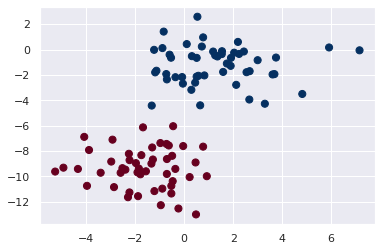

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

一种快速创建简易模型的方法就是假设数据服从高斯分布，且变量无协方差（`no covariance`，指线性无关）。  
只要找出每个标签的所有样本点均值和标准差，再定义一个高斯分布，就可以拟合模型了。  
这个简单的高斯假设分类的结果如下图所示：  
![](../data/figures/05.05-gaussian-NB.png)

In [ ]:
图中的椭圆曲线表示每个标签的高斯生成模型，越靠近椭圆中心的可能性越大。  
通过每种类型的生成模型，可以计算出任意数据点的似然估计（`likelihood`） `P(特征|L1)`，然后根据贝叶斯定理计算出后验概率比值，从而确定每个数据点可能性最大的标签。